# The PageRank Algorithm: Simplified, Damping Factor and Sink Node Handling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#Example without a sink node
#P = np.array([[0,1,0,0,0],
 #             [0,0,0,0,1],
  #            [1,1,0,1,1],
   #           [0,0,1,0,1],
    #          [0,0,0,1,0]])

#Example with a sink node
P = np.array([[0,0,0,0],
              [1,0,1,0],
              [1,0,0,0],
              [1,0,0,0]])


print("\nAdjacency Matrix :\n\n",P)
Rank = np.zeros(P[0].size) #Number of pages that we are targeting
PageStatus = np.zeros((P[0].size,3)) #5 for number of pages in consideration. 
#Column 1 and 2 for number of inbound and for number of outbond links
#Column 3 for sink status. If the node is a sink, it's column 3 value is 1, else zero

#Alloting number of inbound edges
for i in range(Rank.size):
    PageStatus[i][0] = np.sum(P.T[i]) 

#Alloting number of outbound edges
for i in range(Rank.size):
    PageStatus[i][1] = np.sum(P[i]) 
    
#Checking for sink node
for i in range(Rank.size):
    if np.sum(P[i])==0:
        PageStatus[i][2]=1

#Managing the sink node, by putting outbound edges to all nodes
for i in range(Rank.size):
    if PageStatus[i][2]==1:
        for z in range(Rank.size):
            if i!=z:
                P[i][z]=1

#Alloting number of outbound edges
for i in range(Rank.size):
    PageStatus[i][1] = np.sum(P[i]) 

#Initializing the page rank
for i in range(Rank.size):
    Rank[i] = 1/Rank.size
print("\nInitialized Rank: ",Rank)
print("\nPage Status: Denoting number of inbound edges, number of outbound edges and Sink node status\n\n",PageStatus)
print("\nAdjacency Matrix after sink node handling (if any) P: \n\n",P)


Adjacency Matrix :

 [[0 0 0 0]
 [1 0 1 0]
 [1 0 0 0]
 [1 0 0 0]]

Initialized Rank:  [0.25 0.25 0.25 0.25]

Page Status: Denoting number of inbound edges, number of outbound edges and Sink node status

 [[3. 3. 1.]
 [0. 2. 0.]
 [1. 1. 0.]
 [0. 1. 0.]]

Adjacency Matrix after sink node handling (if any) P: 

 [[0 1 1 1]
 [1 0 1 0]
 [1 0 0 0]
 [1 0 0 0]]


Here we are updating the rank. This function is used in both simplified and complete PageRank algorithms.

In [2]:
def calPrev(Previous,P,PageStatus,index):
    sumRank = 0
    #print("Index : ",index+1)
    for j in range(Previous.size):
        if P[j][index]==1:
            #print(j+1)
            sumRank = sumRank + (Previous[j])/PageStatus[j][1]
            #print("Rank: ",Previous[j])
            #print("PageStatus: ",PageStatus[j][2])
            #print("SumRank : ",sumRank)
            
    return sumRank

The following function is for calculating the PageRank using the simplified algorithm

In [3]:
def SimpleAlgorithm(df,Rank):
    Prev = np.zeros(Rank.size)
    for i in range(Rank.size):
        Prev[i] = Rank[i]
    flag = 0
    for q in range(100):
        print("Iteration ",q+1)
        for i in range(Rank.size):
            Rank[i] = calPrev(Rank,P,PageStatus,i)
        for n in range(Rank.size):
            if Rank[n]-Prev[n]<=0.01:
                flag = 1
                break
        for m in range(Rank.size):
            Prev[m] = Rank[m]
        print(Rank)
        print(np.sum(Rank))
        if flag==1:
            break;
    
    print("\nBest possible Page Rank distribution achieved.")
    return Rank

This function uses the Complete PageRank Algorithm that takes into account a damping factor and then calculates the respective page ranks. 

In [4]:
def RankCalculator(df,Rank):
    Prev = np.zeros(Rank.size)
    for i in range(Rank.size):
        Prev[i] = Rank[i]
    flag = 0
    for q in range(100):
        print("Iteration ",q+1)
        for i in range(Rank.size):
            #sumRank = calPrev(Rank,P,PageStatus,i)
            sumRank = calPrev(Prev,P,PageStatus,i)
            Rank[i] = ((1-df)/Rank.size) + (df*sumRank)
        #print(Prev)
        #print(Rank)
        for n in range(Rank.size):
            if Rank[n]-Prev[n]<=0.01:
                flag = 1
                break
        for m in range(Rank.size):
            Prev[m] = Rank[m]
        print(Rank)
        print(np.sum(Rank))
        if flag==1:
            break;
    
    print("\nBest possible Page Rank distribution achieved.")
    return Rank

Iteration  1
[0.56875    0.10833333 0.21458333 0.10833333]
1.0

Best possible Page Rank distribution achieved.
Iteration  1
[0.625      0.20833333 0.3125     0.20833333]
1.3541666666666667

Best possible Page Rank distribution achieved.


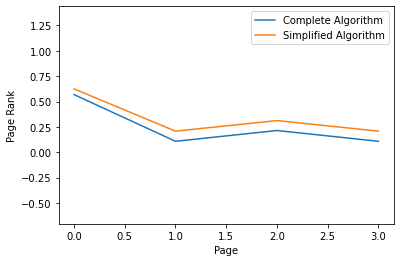

In [5]:
for i in range(Rank.size):
    Rank[i] = 1/Rank.size
Data1D = np.zeros(Rank.size)
Data1D = RankCalculator(0.85,Rank)
plt.plot(Data1D,label = "Complete Algorithm")

for i in range(Rank.size):
    Rank[i] = 1/Rank.size
Data1D_ = np.zeros(Rank.size)
Data1D_ = SimpleAlgorithm(0.85,Rank)
plt.plot(Data1D_, label = "Simplified Algorithm")
plt.axis("equal")
plt.legend()
plt.xlabel("Page")
plt.ylabel("Page Rank")
plt.show()

Damping Factor =  1.0
Iteration  1
[0.625      0.08333333 0.20833333 0.08333333]
1.0

Best possible Page Rank distribution achieved.
Damping Factor =  0.95
Iteration  1
[0.60625    0.09166667 0.21041667 0.09166667]
0.9999999999999999

Best possible Page Rank distribution achieved.
Damping Factor =  0.85
Iteration  1
[0.56875    0.10833333 0.21458333 0.10833333]
1.0

Best possible Page Rank distribution achieved.
Damping Factor =  0.75
Iteration  1
[0.53125 0.125   0.21875 0.125  ]
1.0

Best possible Page Rank distribution achieved.
Damping Factor =  0.65
Iteration  1
[0.49375    0.14166667 0.22291667 0.14166667]
1.0

Best possible Page Rank distribution achieved.
Damping Factor =  0.55
Iteration  1
[0.45625    0.15833333 0.22708333 0.15833333]
0.9999999999999999

Best possible Page Rank distribution achieved.
Damping Factor =  0.45
Iteration  1
[0.41875 0.175   0.23125 0.175  ]
1.0

Best possible Page Rank distribution achieved.
Damping Factor =  0.35
Iteration  1
[0.38125    0.1916666

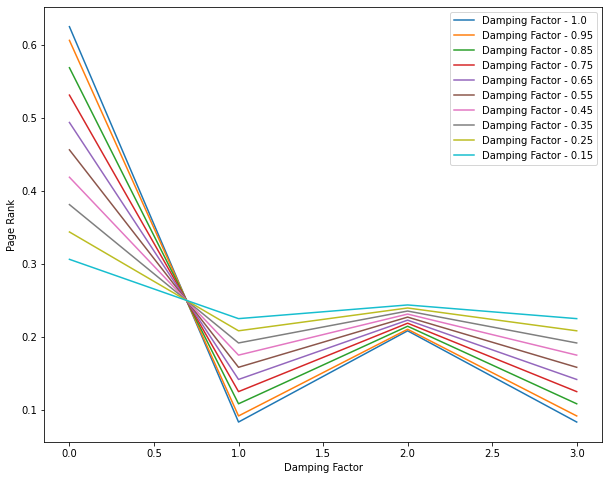

In [6]:
for i in range(Rank.size):
    Rank[i] = 1/Rank.size

Data1D = np.zeros(Rank.size)
Data2D = np.zeros((10,Rank.size))
df = np.array([1.0,0.95,0.85,0.75,0.65,0.55,0.45,0.35,0.25,0.15])
for t in range(df.size):
    print("Damping Factor = ",df[t])
    for i in range(Rank.size):
        Rank[i] = 1/Rank.size

    Data1D = RankCalculator(df[t],Rank)
    for s in range(Rank.size):
        Data2D[t][s]=Data1D[s]

plt.figure(figsize=(10,8))
for i in range(df.size):
    plt.plot(Data2D[i],label="Damping Factor - "+(str)(df[i]))
    plt.xlabel("Damping Factor")
    plt.ylabel("Page Rank")
    plt.legend()